[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/MaxMitre/ML-AI-for-the-Working-Analyst/blob/main/Semana3/Intro_procesamiento_imagenes.ipynb)

En este notebook se dará una introducción al manejo de las imágenes en python,  algunos filtros y funciones de scikit-image.

# numpy.array e imágenes

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
first_image = np.array([[0, 1], [1, 0]])
print(first_image.dtype)
first_image

int64


array([[0, 1],
       [1, 0]])

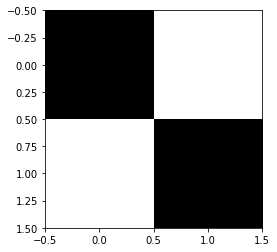

In [ ]:
plt.imshow(first_image, cmap = 'gray')

In [ ]:
second_image = np.array([[0, 1], [3, 0]], dtype = 'float64')
print(second_image.dtype, second_image.shape)
second_image

float64 (2, 2)


array([[0., 1.],
       [3., 0.]])

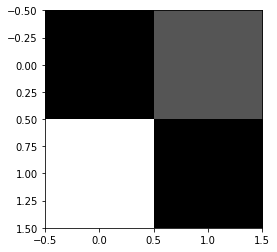

In [ ]:
plt.imshow(second_image, cmap = 'gray')

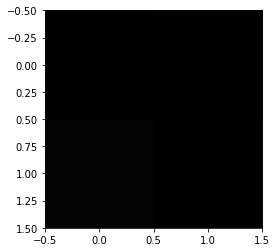

In [ ]:
plt.imshow(second_image, cmap = 'gray', vmin = 0, vmax = 255)

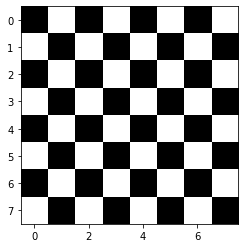

In [ ]:
# https://stackoverflow.com/questions/2169478/how-to-make-a-checkerboard-in-numpy

def checkerboard(shape):
    return np.indices(shape).sum(axis=0) % 2
plt.imshow(checkerboard((8, 8)), cmap = 'gray')

# Canales de la imagen

In [ ]:
from skimage import io

In [ ]:
img = io.imread('https://images.unsplash.com/photo-1635752019785-6637044adea9?ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&ixlib=rb-1.2.1&auto=format&fit=crop&w=774&q=80')
print(type(img), img.dtype)
img.shape

<class 'numpy.ndarray'> uint8


(1161, 774, 3)

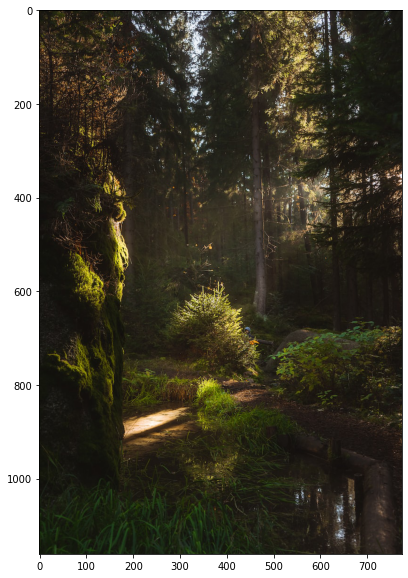

In [ ]:
plt.figure(figsize = (10, 10))
plt.imshow(img)

In [ ]:
def plt_img(img):
    plt.figure(figsize = (10, 10))
    plt.imshow(img)

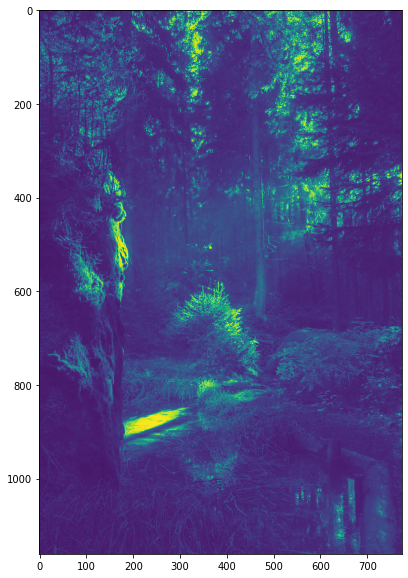

In [ ]:
plt_img(img[:, :, 0]) # Si recibe un único canal ocupa la paleta viridis

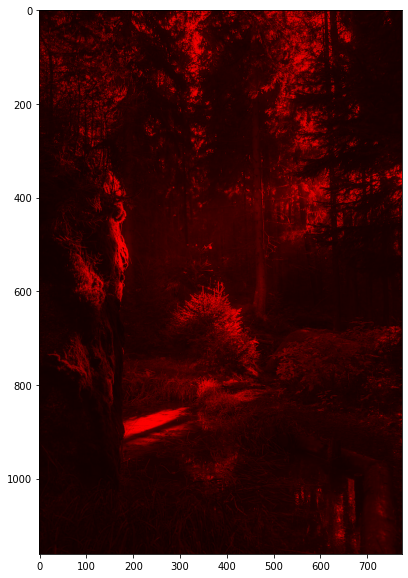

In [ ]:
img_r = img.copy()
img_r[:, :, 1:] = 0   # [1,2]

plt_img(img_r)

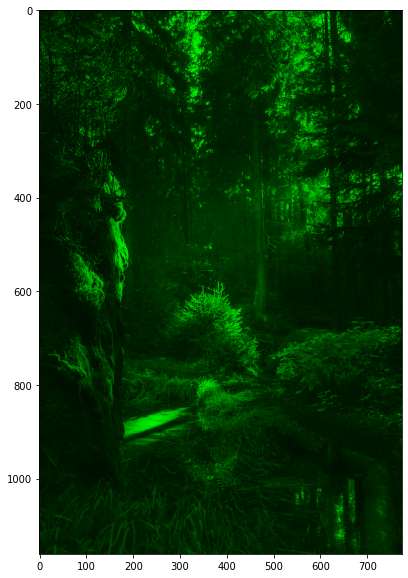

In [ ]:
img_g = img.copy()
img_g[:, :, [0, 2]] = 0
plt_img(img_g)

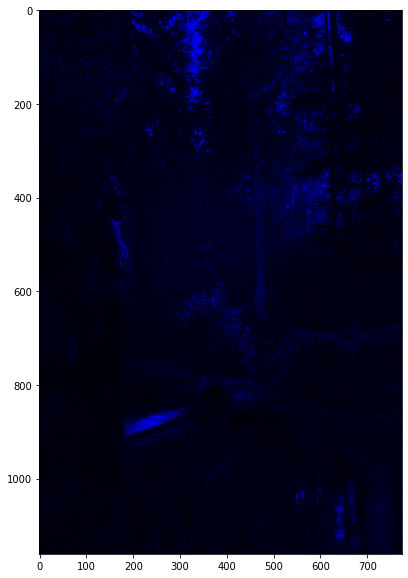

In [ ]:
# EJERCICIO
# Gráficar sólo el canal azúl
img_b = img.copy()
img_b[:, :, :2] = 0 # [1, 0]
plt_img(img_b)

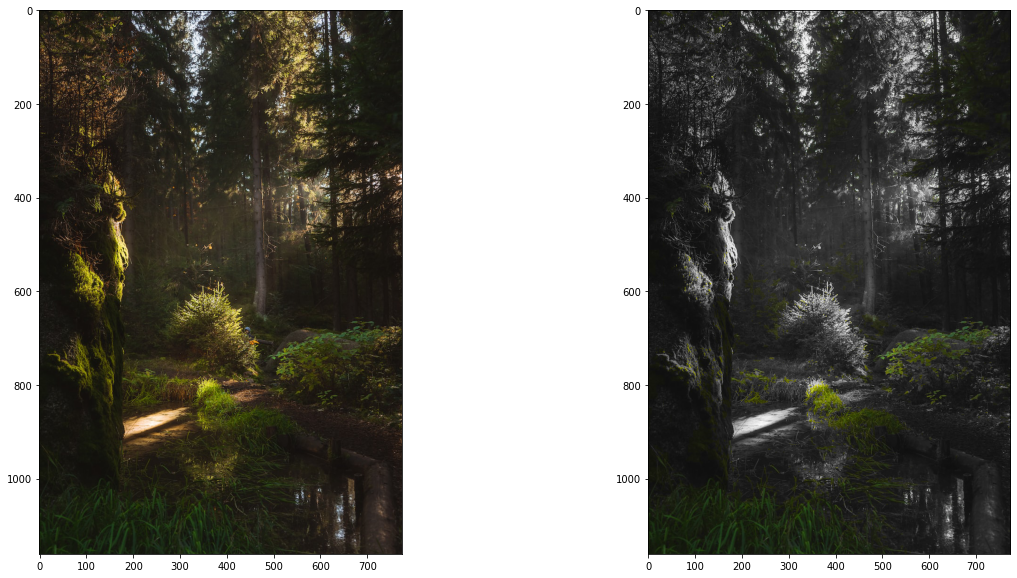

In [ ]:
mask = (img[:, :, 1] > img[:, :, 0]) * (img[:, :, 1] > img[:, :, 2])
# mask = (img[:, :, 2] > img[:, :, 1])  * (img[:, :, 2] > img[:, :, 0])

from skimage import color

img_gray = (color.gray2rgb(color.rgb2gray(img))*255).astype(np.uint8)

img_gray[:, :, 0][mask] = img[:, :, 0][mask]
img_gray[:, :, 1][mask] = img[:, :, 1][mask]
img_gray[:, :, 2][mask] = img[:, :, 2][mask]

fig, ax = plt.subplots(1, 2, figsize=(20, 10))
ax[0].imshow(img)
ax[1].imshow(img_gray)

fig.show()

# Tamaño de la imagen


In [ ]:
from skimage import data

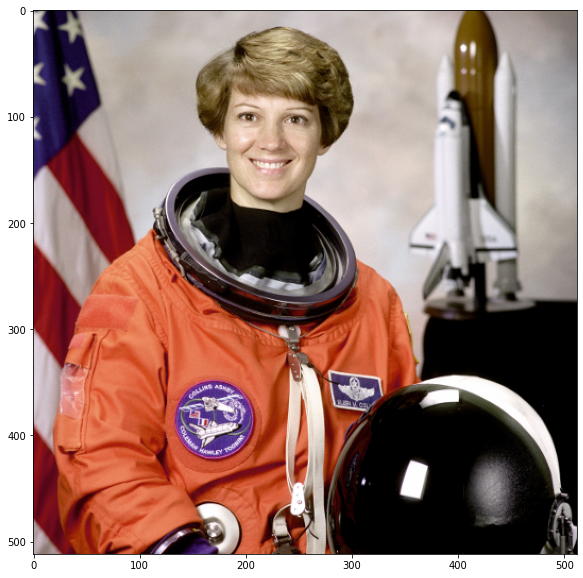

In [ ]:
astronaut_color = data.astronaut()
plt_img(astronaut_color)

In [ ]:
# Ya hicimos la importación, pero es la que utilizaremos
from skimage import color

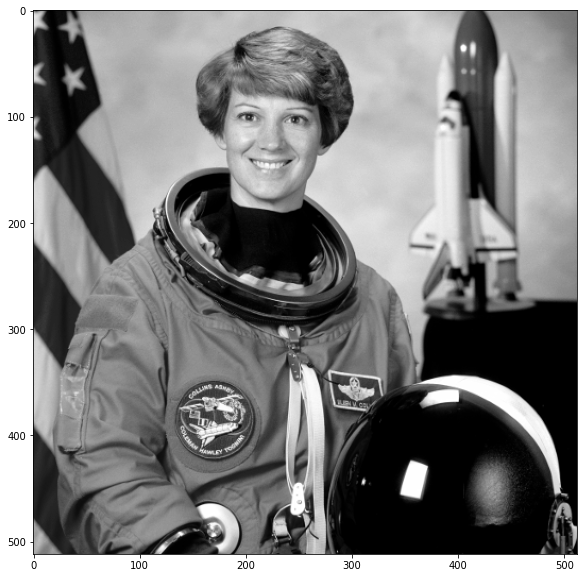

In [ ]:
astronaut = color.rgb2gray(astronaut_color)
plt.figure(figsize = (10, 10))
plt.imshow(astronaut, cmap = 'gray')

In [ ]:
astronaut.shape

(512, 512)

In [ ]:
from skimage.transform import rescale, resize

<center><img src='https://techterms.com/img/xl/image_scaling_1392.png' width="400"> </center>

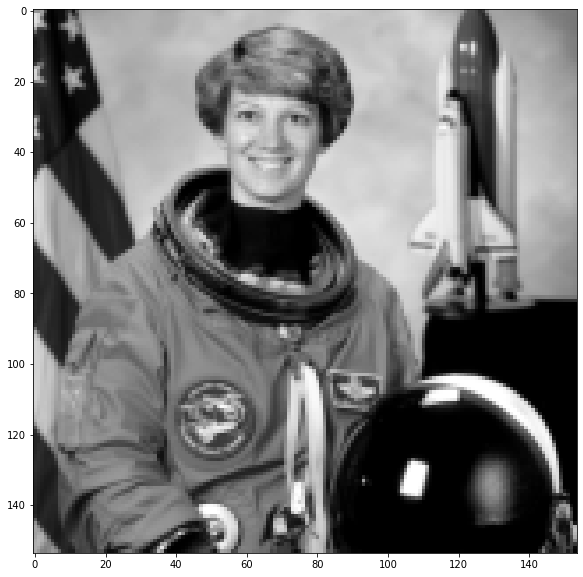

In [ ]:
astronaut_rescale = rescale(astronaut, 0.3) # Recibe un factor de reescalamiento
plt.figure(figsize = (10, 10))
plt.imshow(astronaut_rescale, cmap = 'gray')

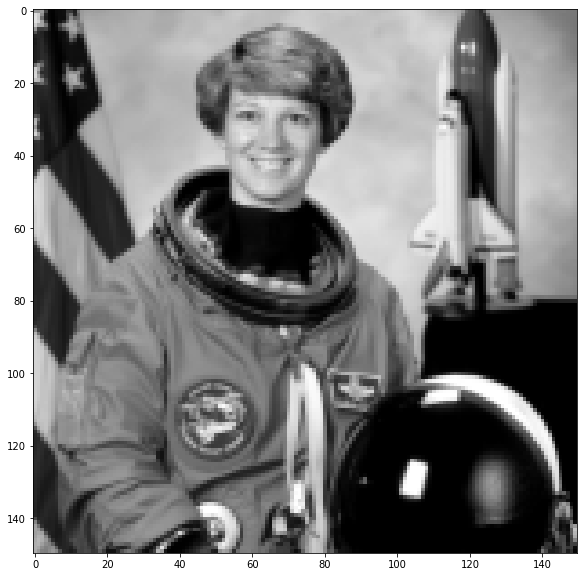

In [ ]:
astronaut_resize = resize(astronaut, (150, 150)) # Recibe el tamaño de la imagen nueva
plt.figure(figsize=(10, 10))
plt.imshow(astronaut_resize, cmap = 'gray')

In [ ]:
print(astronaut_color.shape, astronaut.shape, astronaut_rescale.shape, astronaut_resize.shape)

(512, 512, 3) (512, 512) (154, 154) (150, 150)


In [ ]:
# Número de pixeles en cada imagen

# Filtros


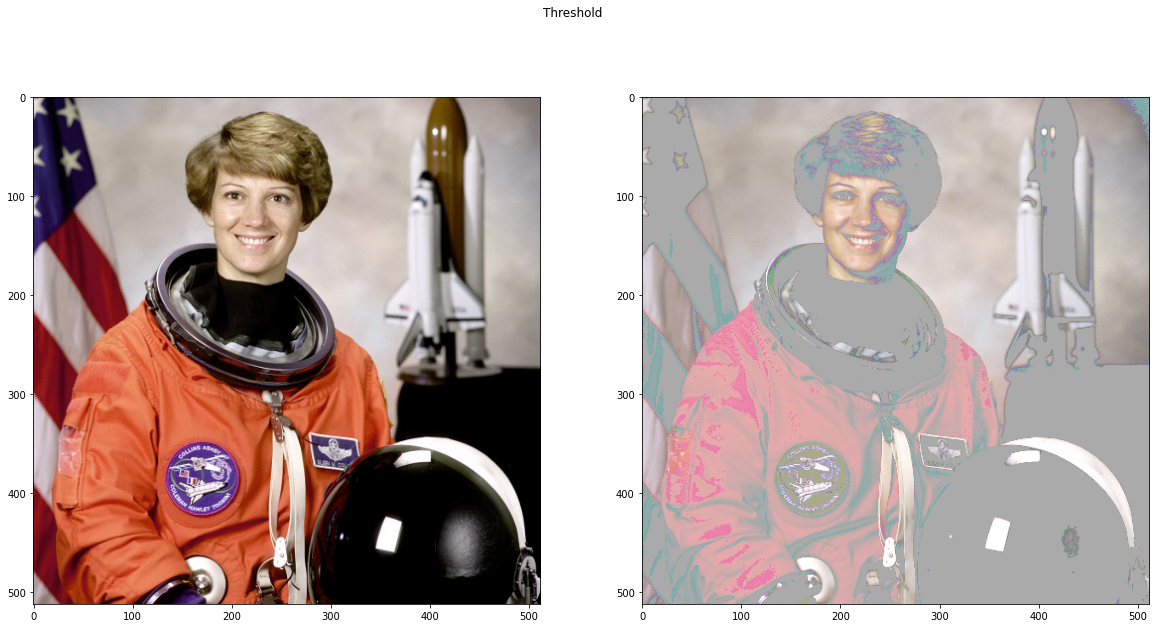

In [ ]:
trh = astronaut_color.copy() 
trh[astronaut_color < 125] = 170

fig, ax = plt.subplots(1, 2, figsize=(20, 10))
fig.suptitle('Threshold')
ax[0].imshow(astronaut_color)
ax[1].imshow(trh)

fig.show()

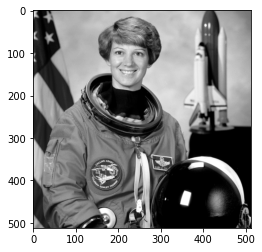

In [ ]:
plt.imshow(astronaut, cmap='gray')

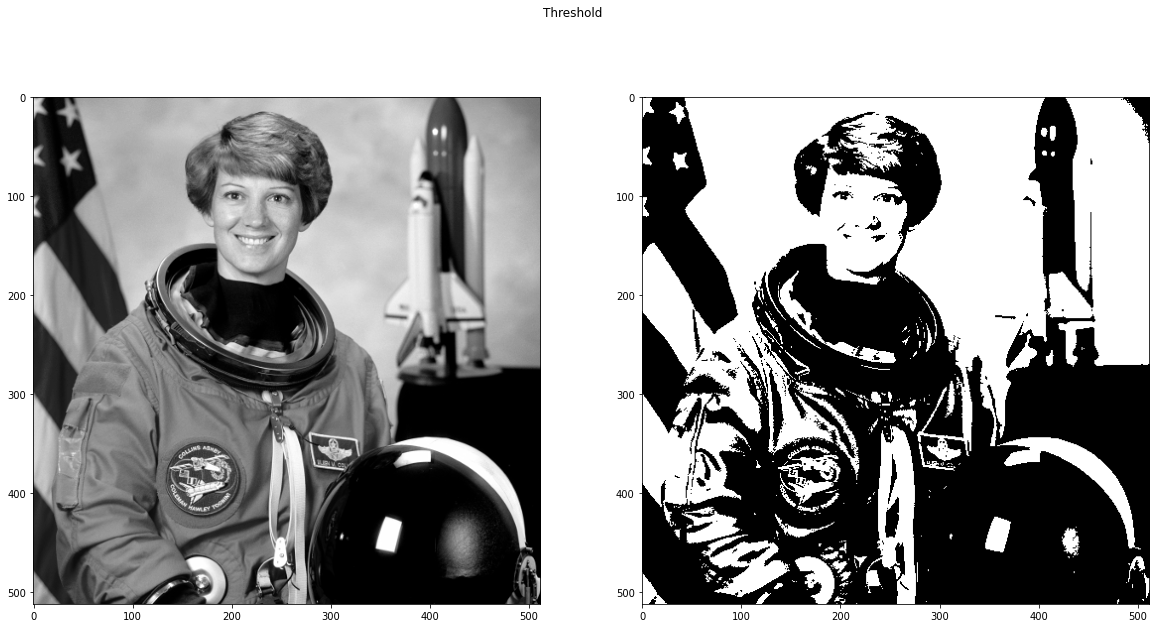

In [ ]:
trh2 = astronaut.copy() 
trh2[astronaut < .5] = 0
trh2[astronaut >= .5] = 1

fig, ax = plt.subplots(1, 2, figsize=(20, 10))
fig.suptitle('Threshold')
ax[0].imshow(astronaut, cmap = 'gray')
ax[1].imshow(trh2, cmap = 'gray')

fig.show()

In [ ]:
ax

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f7842d65890>,
      dtype=object)

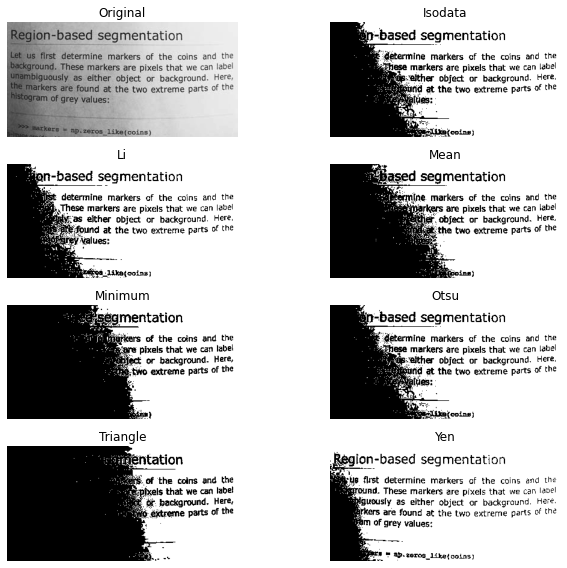

In [ ]:
# https://scikit-image.org/docs/dev/auto_examples/segmentation/plot_thresholding.html
from skimage.filters import try_all_threshold

img = data.page()

fig, ax = try_all_threshold(img, figsize=(10, 8), verbose=False)
plt.show()


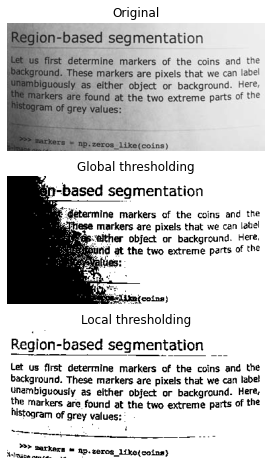

In [ ]:
## https://scikit-image.org/docs/stable/auto_examples/applications/plot_thresholding.html#sphx-glr-auto-examples-applications-plot-thresholding-py

from skimage.filters import threshold_otsu, threshold_local


image = data.page()

global_thresh = threshold_otsu(image)
binary_global = image > global_thresh

block_size = 35
local_thresh = threshold_local(image, block_size, offset=10)
binary_local = image > local_thresh

fig, axes = plt.subplots(nrows=3, figsize=(7, 8))
ax = axes.ravel()
plt.gray()

ax[0].imshow(image)
ax[0].set_title('Original')

ax[1].imshow(binary_global)
ax[1].set_title('Global thresholding')

ax[2].imshow(binary_local)
ax[2].set_title('Local thresholding')

for a in ax:
    a.axis('off')

plt.show()

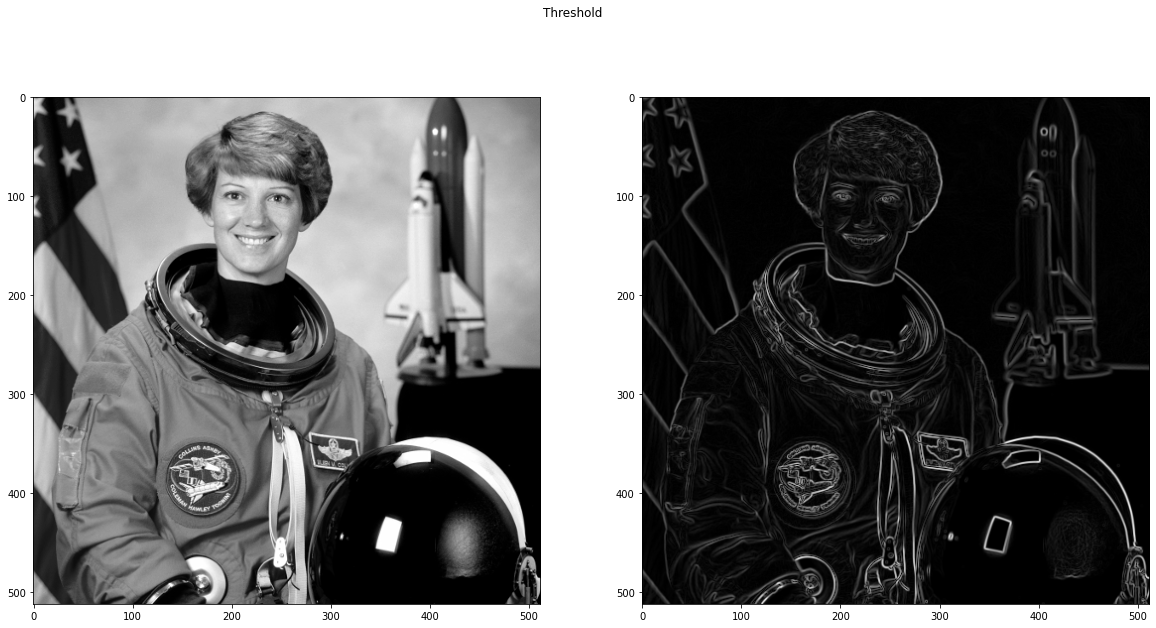

In [ ]:
from skimage.filters import sobel

edges = sobel(astronaut)

fig, ax = plt.subplots(1, 2, figsize=(20, 10))
fig.suptitle('Threshold')
ax[0].imshow(astronaut, cmap = 'gray')
ax[1].imshow(edges, cmap = 'gray')

fig.show()

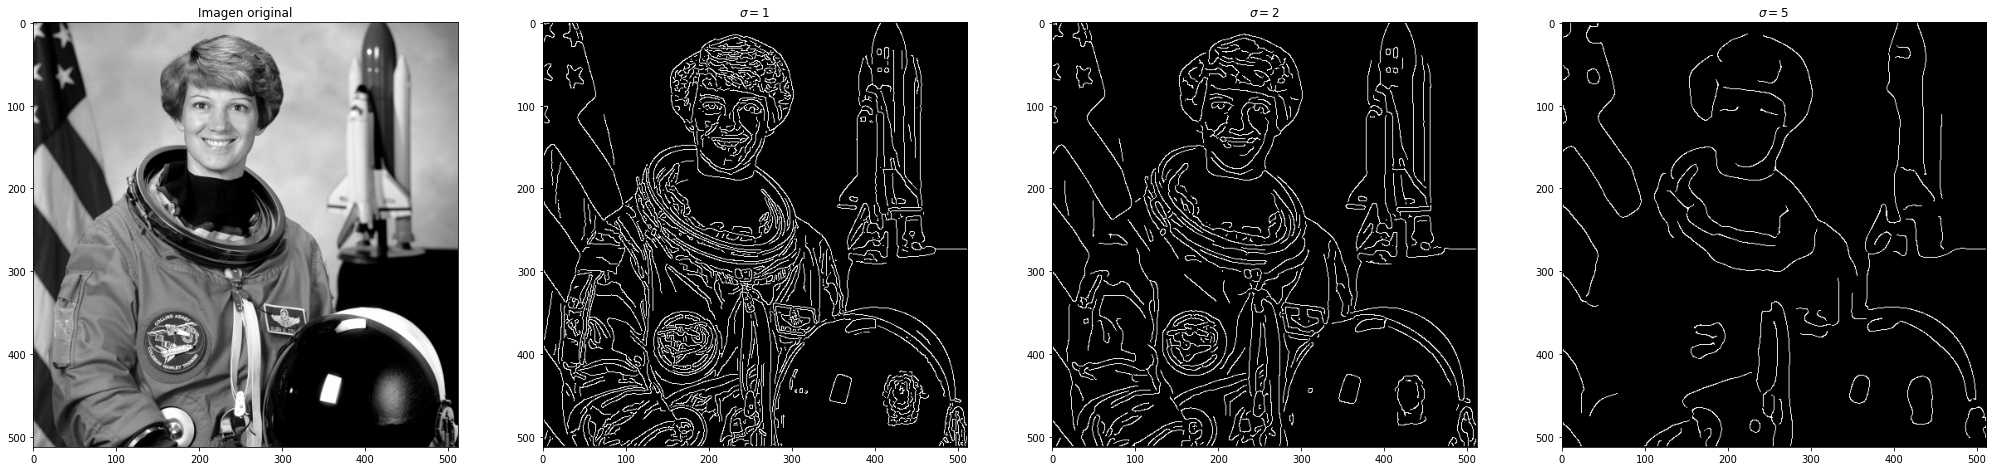

In [ ]:
from skimage.feature import canny

edges1 = canny(astronaut)
edges2 = canny(astronaut, sigma=2)
edges3 = canny(astronaut, sigma=5)

fig, ax = plt.subplots(1, 4, figsize=(35, 10))
ax[0].imshow(astronaut, cmap = 'gray')
ax[0].set_title('Imagen original')
ax[1].imshow(edges1, cmap = 'gray')
ax[1].set_title('$\sigma = 1$')
ax[2].imshow(edges2, cmap = 'gray')
ax[2].set_title('$\sigma = 2$')
ax[3].imshow(edges3, cmap = 'gray')
ax[3].set_title('$\sigma = 5$')

fig.show()

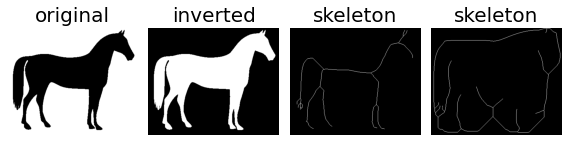

In [ ]:
# https://scikit-image.org/docs/dev/auto_examples/edges/plot_skeleton.html#sphx-glr-auto-examples-edges-plot-skeleton-py

from skimage.morphology import skeletonize
from skimage import data
import matplotlib.pyplot as plt
from skimage.util import invert

# Invert the horse image
image = invert(data.horse())

# perform skeletonization
skeleton = skeletonize(image)

# display results
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(8, 4),
                         sharex=True, sharey=True)

ax = axes.ravel()

ax[0].imshow(data.horse(), cmap=plt.cm.gray)
ax[0].axis('off')
ax[0].set_title('original', fontsize=20)

ax[1].imshow(image, cmap=plt.cm.gray)
ax[1].axis('off')
ax[1].set_title('inverted', fontsize=20)

ax[2].imshow(skeleton, cmap=plt.cm.gray)
ax[2].axis('off')
ax[2].set_title('skeleton', fontsize=20)

ax[3].imshow(skeletonize(data.horse()), cmap=plt.cm.gray)
ax[3].axis('off')
ax[3].set_title('skeleton', fontsize=20)

fig.tight_layout()
plt.show()

# Enlaces interesantes

- https://docs.opencv.org/master/d1/dfd/tutorial_motion_deblur_filter.html